_Carmen Díez_ - Week 4 exercises

## Exercise 1 - Linear regression with feature selection

In [1]:
import pandas as pd
from ast import literal_eval
import operator
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#1
data = pd.read_csv('ted_main.csv')
data

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [3]:
data['ratings']=data['ratings'].str.replace("'",'"')
ratings_columns = data.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name']))
data = data.merge(ratings_columns.loc[:, ['Funny', 'Confusing', 'Inspiring']],left_index=True, right_index=True)
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'Funny', 'Confusing', 'Inspiring'],
      dtype='object')

In [4]:
#tags as a list of strings
data.loc[:,'tags'] = data.loc[:,'tags'].apply(lambda x: literal_eval(x))

counter ={}
for tag in data['tags']:
    for word in tag:
        if word not in counter:
            counter[word] = 0
        counter[word] += 1
counter_sort = sorted(counter.items(), key=operator.itemgetter(1), reverse=True)
top_100 = counter_sort[:100]
top_100

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229),
 ('society', 224),
 ('art', 221),
 ('social change', 218),
 ('future', 195),
 ('communication', 191),
 ('creativity', 189),
 ('biology', 189),
 ('humanity', 182),
 ('collaboration', 174),
 ('environment', 165),
 ('economics', 164),
 ('medicine', 162),
 ('brain', 158),
 ('activism', 157),
 ('education', 153),
 ('community', 148),
 ('history', 146),
 ('children', 143),
 ('TED Fellows', 143),
 ('music', 140),
 ('invention', 140),
 ('health care', 132),
 ('politics', 128),
 ('cities', 123),
 ('psychology', 122),
 ('storytelling', 120),
 ('performance', 117),
 ('women', 117),
 ('nature', 116),
 ('war', 113),
 ('identity', 113),
 ('computers', 111),
 ('engineering', 111),
 ('life', 111),
 ('animals', 109),
 ('Africa', 105),
 ('humor', 105),
 ('exploration', 100),
 ('personal growth', 96),
 (

In [5]:
#binary variable for each of the top 100 tags and include them in the dataframe
for word in top_100:
    binary = []
    for tag in data['tags']:
        if word[0] in tag:
            binary.append(1)
        else:
            binary.append(0)
    data[word[0]] = binary

In [6]:
#2
data = data.drop(columns=['description','main_speaker','name','film_date','event','ratings','speaker_occupation','published_date','related_talks','tags','title','url'])
data

,comments,duration,languages,num_speaker,views,Funny,Confusing,Inspiring,technology,science,...,food,religion,peace,ecology,family,demo,poetry,illness,universe,energy
0,4553,1164,60,1,47227110,19645,242,24924,0,0,...,0,0,0,0,0,0,0,0,0,0
1,265,977,43,1,3200520,544,62,413,1,1,...,0,0,0,0,0,0,0,0,0,0
2,124,1286,26,1,1636292,964,27,230,1,0,...,0,0,0,0,0,0,0,0,0,0
3,200,1116,35,1,1697550,59,32,1070,0,0,...,0,0,0,0,0,0,0,0,0,0
4,593,1190,48,1,12005869,1390,72,2893,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,476,4,1,450430,1,2,27,0,0,...,0,0,0,0,1,0,0,0,0,0
2546,6,290,3,1,417470,20,0,20,0,1,...,0,0,0,0,0,0,0,0,1,0
2547,10,651,1,1,375647,1,5,30,0,1,...,0,0,0,0,0,0,0,0,0,0
2548,32,1100,1,1,419309,63,1,147,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
columns_top_100 = []
for word in top_100:
    columns_top_100.append(word[0])  

In [8]:
#Linear regression with the top 100 tags
X_train, X_test, y_train, y_test = train_test_split(data[columns_top_100], data['views'], test_size=0.20, random_state=1234)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.0485723652543264

We see that the tags are not really useful.

In [9]:
more_cols = list(data.columns.drop(['Funny','Confusing','Inspiring','views']))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[more_cols], data['views'], test_size=0.20, random_state=1234)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.4830789023772576

The linear regression has a better score with all the other columns (except Funny, Confusing and Inspiring).

In [11]:
#3
#Linear regression with the ratings (Funny, Confusing and Inspiring).
X_train, X_test, y_train, y_test = train_test_split(data[["Funny", "Confusing", "Inspiring"]], data['views'], test_size=0.20, random_state=1234)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.771124835136799

In [12]:
#Linear regression with all the columns.
X_train, X_test, y_train, y_test = train_test_split(data[list(data.columns.drop(['views']))], data['views'], test_size=0.20, random_state=1234)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7850348624617799

The score is really similar between the one with all the columns and the one that only uses Funny, Confusing and Inspiring. Therefore, these three columns give the most relevant information.

In [13]:
#4
#We calcualte the p-values for the tags
X = data[columns_top_100]
y = data['views']
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const            2.604467e-52
technology       5.301717e-02
science          1.990802e-01
global issues    3.999266e-03
culture          1.202794e-05
                     ...     
demo             1.874363e-03
poetry           5.710843e-01
illness          4.780115e-02
universe         3.319765e-01
energy           9.980644e-01
Length: 101, dtype: float64

In [14]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
model.pvalues[selected_features_BE]

['science', 'global issues', 'culture', 'design', 'business', 'art', 'economics', 'brain', 'activism', 'education', 'politics', 'psychology', 'war', 'humor', 'neuroscience', 'work', 'motivation', 'mental health', 'demo']


science          1.704182e-02
global issues    3.052233e-03
culture          1.143300e-07
design           9.698490e-04
business         1.342675e-02
art              1.263884e-02
economics        9.561056e-03
brain            2.186586e-04
activism         4.458669e-02
education        1.196642e-02
politics         4.481958e-02
psychology       4.204522e-14
war              4.985270e-02
humor            3.315460e-03
neuroscience     4.036523e-03
work             7.386773e-05
motivation       6.821467e-04
mental health    3.065573e-03
demo             7.148067e-04
dtype: float64

###### 5.
Tags such as science, education, activism, politics, business, art and war have the greatest p-values. Still, the p-value difference between the tags do not change that much, so they do not seem so relevant.
Still, getting certain ratings, seems the best way to get more or less views.

## Exercise 2 - HASYv2 (part 2)

In [15]:
import pandas as pd
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tpot import TPOTClassifier
import numpy as np

/home/dmcarmen/.local/lib/python3.6/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [16]:
#1
labels = pd.read_csv('../week3/hasy-data-labels.csv')
labels = labels[(labels['symbol_id']>=70) & (labels['symbol_id']<=80)]
labels[:10]

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10
350,hasy-data/v2-00350.png,70,0,10
351,hasy-data/v2-00351.png,70,0,517
352,hasy-data/v2-00352.png,70,0,1001
353,hasy-data/v2-00353.png,70,0,5879
354,hasy-data/v2-00354.png,70,0,6902


In [17]:
X = []
for path in labels['path']:
    img = mpimg.imread('../week3/' + path)
    img = img.flatten()
    X.append(img)

In [18]:
y = labels['symbol_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8235294117647058

      0         1
0    10  0.671569
1    20  0.745098
2    30  0.759804
3    40  0.764706
4    50  0.789216
5    60  0.779412
6    70  0.784314
7    80  0.799020
8    90  0.794118
9   100  0.813725
10  110  0.808824
11  120  0.803922
12  130  0.794118
13  140  0.813725
14  150  0.799020
15  160  0.803922
16  170  0.813725
17  180  0.818627
18  190  0.799020
19  200  0.803922


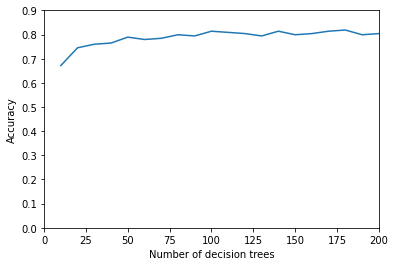

In [20]:
#2
accuracy = []
for i in range(1,21):
    prof = i*10
    model = RandomForestClassifier(n_estimators = prof,random_state = 42)
    model.fit(X_train,y_train)
    accuracy.append((prof, model.score(X_test, y_test)))

df = pd.DataFrame(accuracy)
print(df)
plt.plot(df[0],df[1])
plt.axis([0, 200, 0,0.9])
plt.xlabel('Number of decision trees')
plt.ylabel('Accuracy')
plt.show()

It improves at the beiginning and then the accuracy is similar.

###### 3.
We shouldn't decide the hyperparameters using the test data as it would get an optimistic score, which does not really tell how good is our model to a differet test dataset.

In [21]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=2)

In [23]:
accuracy = 0
for i in range(1,21):
    prof = i*10
    model = RandomForestClassifier(n_estimators = prof,random_state = 2)
    model.fit(X_train,y_train)
    if model.score(X_val, y_val) > accuracy:
        accuracy = model.score(X_val, y_val)
        best_trees = prof

model = RandomForestClassifier(n_estimators = prof,random_state = 2)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.803921568627451

More general than the previous one as we have chosen the hyperparameter only with part of the test data.

In [24]:
#5
imgs_array = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(imgs_array, y, train_size=0.8, random_state=2)
tpot = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2, random_state = 42)

tpot.fit(X_train,y_train)
print(tpot.score(X_test, y_test))

Widget Javascript not detected.  It may not be installed or enabled properly.



Generation 1 - Current best internal CV score: 0.8505760885829717
Generation 2 - Current best internal CV score: 0.8505760885829717
Generation 3 - Current best internal CV score: 0.8725871614544367
Generation 4 - Current best internal CV score: 0.888523118360018
Generation 5 - Current best internal CV score: 0.888523118360018
Best pipeline: LogisticRegression(StandardScaler(input_matrix), C=1.0, dual=False, penalty=l2)
0.8578431372549019
